In [0]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [3]:
!pip install scikit-optimize

In [4]:
!pip install scikit-learn==0.20.3

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train.head(2)

Unnamed: 0   Rent   Area  MinWalk  MinBus  StationCount  LineCount  R  K  \
0           0  75000  20.01        4       0             3          3  1  1   
1           1  76000  16.50        5       0             3          3  1  0   

   L  D  S  NewConstr  Year  Month  FloorTh  FloorNum  UndergroundTh  \
0  0  0  0      False     9    117        1        12              0   
1  0  0  0      False    44    538        5        10              0   

   UndergroundNum  House  warmseat  shower  dryer  bathtoilet  memorial  \
0               0  False      True    True   True        True     False   
1               0  False      True    True  False       False     False   

   washstand  dressing toilet  bath  gasstove  systemkitchen  hotwatersupply  \
0      False     False  専用トイレ  専用バス      True           True            True   
1      False     False  専用トイレ  バスなし      True           True            True   

   separatekitchen     IH  fridge  installedstove  counterkitchen  \
0            False  False   False           False           False   
1            False  False   False           False           False   

   Lshapekitchen  unknown  electricstove  stove  freeusage  cable  csantenna  \
0          False    False          False      2      False  False       True   
1          False    False          False      1      False  False      False   

    catv  opticalfiber  internetcompatible  bsantenna  highspeed  rentalvideo  \
0   True         False                True       True      False        False   
1  False         False                True      False      False        False   

    park  drugstore  ...  wooden  YearContract  MonthContract  fixedterm  \
0   True       True  ...   False             2             24      False   
1  False      False  ...   False             2             24      False   

   metter   汲み取り   床下収納  クッションフロア  二重サッシ  ルーフバルコニー    床暖房  エアコン付  洗濯機置場なし  \
0     495  False  False     False  False     False  False   True    False   
1    1283  False  False     False  False     False  False   True    False   

      井戸     冷房   公営水道  トランクルーム  水道その他  バリアフリー  二世帯住宅    専用庭   ガス暖房  ロフト付き  \
0  False  False   True    False  False   False  False  False  False  False   
1  False  False  False    False  False   False  False  False  False  False   

   バルコニー    浄化槽   都市ガス  ウォークインクローゼット  ペアガラス     下水  タイル張り    地下室  フローリング  \
0   True  False   True         False  False   True  False  False    True   
1   True  False  False         False  False  False   True  False    True   

   敷地内ごみ置き場  室外洗濯機置場  エレベーター    防音室  ガスその他   2面採光  シューズボックス  排水その他   3面採光  \
0      True    False    True  False  False  False      True  False  False   
1      True    False    True  False  False  False      True  False  False   

    石油暖房     出窓  オール電化  室内洗濯機置場  24時間換気システム  プロパンガス  Direction_le  \
0  False  False  False     True       False   False          6150   
1  False  False  False     True       False   False         23254   

   Material_le  City_le  Station_le  Line_le  
0        34809     2061         216     2609  
1         7494     2532         370     2719  

[2 rows x 124 columns]

In [0]:
#let's create this function to make it easier and clean to fit the model and use the cross_val_score and obtain results
import time #implementing in this function the time spent on training the model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def modelfit(alg, dtrain, target, only_predict = False):
    X_train, X_valid, y_train, y_valid = train_test_split(dtrain, target, random_state=42,test_size=0.2)
    #Fit the algorithm on the data
    time_start = time.perf_counter() #start counting the time
    if not only_predict:
        alg.fit(X_train, y_train,eval_set =[(X_train,y_train,'train'),(X_valid,y_valid,'test')] , eval_metric=["rmse","rmse"],verbose=True,early_stopping_rounds=500)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(alg, X_train,y_train, cv=kfolds, scoring='neg_mean_squared_error',verbose=1)
    cv_score = np.sqrt(-cv_score)

    time_end = time.perf_counter()
    
    total_time = time_end-time_start
    #Print model report:
    print("\nModel Report")
    print("RMSE :  {:.4f}".format(np.sqrt(mean_squared_error(y_train, dtrain_predictions))))
    print("CV Score : Mean -  %.4f | Std -  %.4f | Min -  %.4f | Max - %.4f" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print("Amount of time spent during training the model and cross validation: %4.3f seconds" % (total_time))

In [0]:
#let's create this function to make it easier and clean to fit the model and use the cross_val_score and obtain results
import time #implementing in this function the time spent on training the model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def cross(alg, dtrain, target, only_predict = False):
    time_start = time.perf_counter() #start counting the time
        
    #Predict training set:
    
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(alg, dtrain,target, cv=kfolds, scoring='neg_mean_squared_error',verbose=1)
    cv_score = np.sqrt(-cv_score)

    time_end = time.perf_counter()
    
    total_time = time_end-time_start
    #Print model report:
    print("\nModel Report")
    print("CV Score : Mean -  %.4f | Std -  %.4f | Min -  %.4f | Max - %.4f" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print("Amount of time spent during training the model and cross validation: %4.3f seconds" % (total_time))

In [0]:
# Plot feature importance
def plot_feature_importance(model, df):
    feature_importance = model.feature_importances_[:30]
    # make importances relative to max importance
    plt.figure(figsize=(20, 20)) #figure size
    feature_importance = 100.0 * (feature_importance / feature_importance.max()) #making it a percentage relative to the max value
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df.columns[sorted_idx], fontsize=15) #used train_drop here to show the name of each feature instead of our train_prepared 
    plt.xlabel('Relative Importance', fontsize=20)
    plt.ylabel('Features', fontsize=20)
    plt.title('Variable Importance', fontsize=30)

In [0]:
X = train.drop([train.columns[0],'Rent'], axis=1)
y = train['Rent']/train['Area']
X_test = test.drop(test.columns[0],axis=1)

In [0]:
from skopt import BayesSearchCV 
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

params={'num_leaves': (5, 256,),
        'max_bin': (32, 512),
        'bagging_fraction': (0.7, 1.0),
        'feature_fraction':(0.2,0.9),
        'bagging_freq':(0,100),
        'feature_fraction_seed':(0,100),
        'bagging_seed':(0,100),
        'min_data_in_leaf':(0,100),
        'min_sum_hessian_in_leaf':(0,100),
        }

bayes=BayesSearchCV(lgb.LGBMRegressor(),params,n_iter=10,scoring='neg_mean_squared_error',cv=10,random_state=42)
res=bayes.fit(X,y)
print(res.best_params_)


{'bagging_fraction': 0.8851238075506949, 'bagging_freq': 78, 'bagging_seed': 36, 'feature_fraction': 0.8120277067341204, 'feature_fraction_seed': 59, 'max_bin': 317, 'min_data_in_leaf': 65, 'min_sum_hessian_in_leaf': 42, 'num_leaves': 189}


In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=189,
                              learning_rate=0.05, n_estimators=5000,
                              max_bin = 317, bagging_fraction = 0.8851238075506949,
                              bagging_freq = 78, feature_fraction = 0.8120277067341204,
                              feature_fraction_seed=59, bagging_seed=36,
                              min_data_in_leaf =65, min_sum_hessian_in_leaf = 42)
modelfit(model_lgb, X, y)

[1]	training's l2: 1.03189e+06	training's rmse: 1015.82	valid_1's l2: 984210	valid_1's rmse: 992.073
Training until validation scores don't improve for 500 rounds.
[2]	training's l2: 961153	training's rmse: 980.384	valid_1's l2: 916141	valid_1's rmse: 957.153
[3]	training's l2: 893233	training's rmse: 945.11	valid_1's l2: 850936	valid_1's rmse: 922.462
[4]	training's l2: 831989	training's rmse: 912.134	valid_1's l2: 792709	valid_1's rmse: 890.342
[5]	training's l2: 775826	training's rmse: 880.81	valid_1's l2: 739313	valid_1's rmse: 859.833
[6]	training's l2: 730289	training's rmse: 854.569	valid_1's l2: 695427	valid_1's rmse: 833.922
[7]	training's l2: 683720	training's rmse: 826.874	valid_1's l2: 651141	valid_1's rmse: 806.933
[8]	training's l2: 643289	training's rmse: 802.053	valid_1's l2: 611934	valid_1's rmse: 782.262
[9]	training's l2: 604311	training's rmse: 777.375	valid_1's l2: 575336	valid_1's rmse: 758.509
[10]	training's l2: 568340	training's rmse: 753.883	valid_1's l2: 5406

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Model Report
RMSE :  271.6707
CV Score : Mean -  369.6337 | Std -  57.4404 | Min -  324.5456 | Max - 481.9347
Amount of time spent during training the model and cross validation: 32.222 seconds


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.5s finished


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: more than one metric available, picking one to plot.
  """Entry point for launching an IPython kernel.


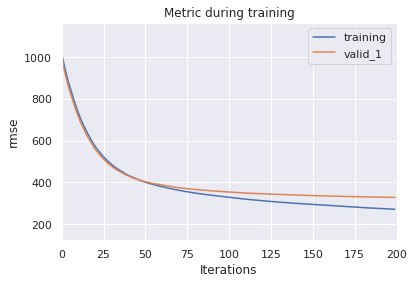

In [0]:
lgb.plot_metric(model_lgb.evals_result_)


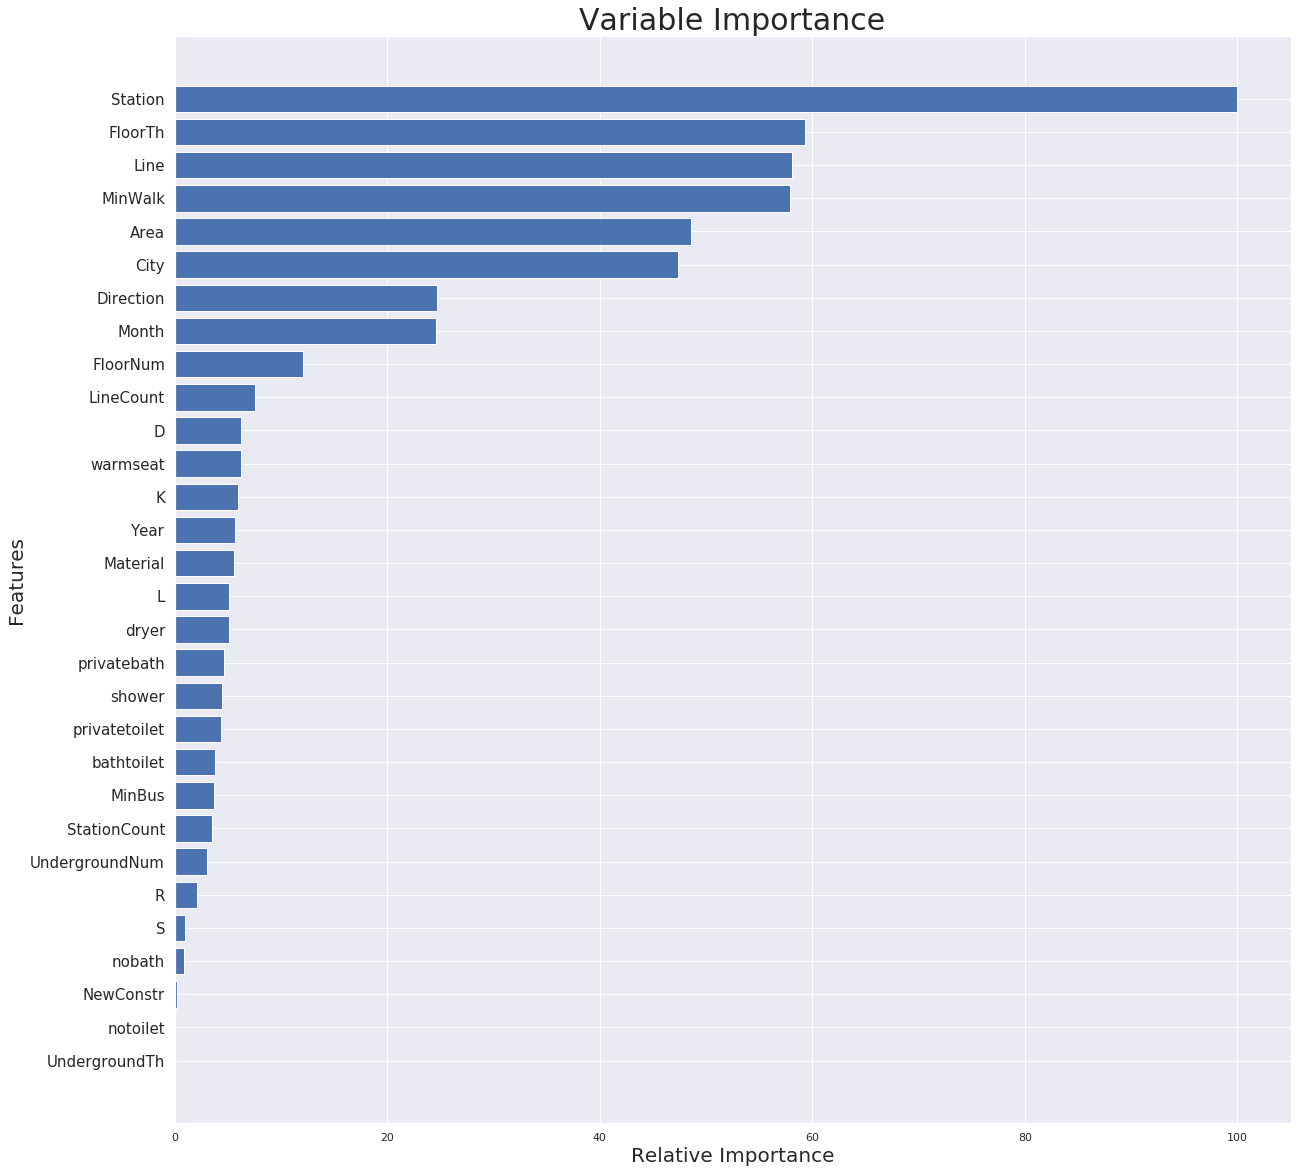

In [0]:
plot_feature_importance(model_lgb, X)


In [0]:
submit = pd.read_csv('sample_submit.csv', names=('id', 'Rent'))
submit['Rent'] = (model_lgb.predict(X_test))*np.expm1(X_test['Area']) 
submit.head(10)
submit.to_csv('submission.csv', header=False, index=False)

In [0]:
submit.head(10)


id           Rent
0  31471  133598.868068
1  31472  108187.721540
2  31473   71088.569877
3  31474   54172.391797
4  31475  110980.579829
5  31476   69062.716537
6  31477   84781.691358
7  31478   96299.321887
8  31479   74305.234027
9  31480  125271.380829